# **Proyek Recommendation System: [Book Recomemendation System]**
*   Nama: Sandy Sanjaya
*   Email: sandyysanjayaa@upi.edu
*   ID Dicoding: Sandy Sanjaya

Selama beberapa dekade terakhir, dengan berkembangnya platform seperti YouTube, Amazon, dan Netflix, sistem rekomendasi telah menjadi bagian yang tidak terpisahkan dari kehidupan digital kita. Dalam berbagai layanan digital seperti e-commerce, platform streaming, hingga iklan daring, sistem rekomendasi membantu menyarankan konten yang sesuai dengan preferensi pengguna — mulai dari produk untuk dibeli, film untuk ditonton, hingga buku untuk dibaca.

Secara umum, sistem rekomendasi adalah algoritma yang bertujuan menyarankan item relevan kepada pengguna, berdasarkan minat dan pola interaksi mereka. Di banyak industri, sistem ini sangat krusial karena mampu meningkatkan pendapatan secara signifikan dan menjadi keunggulan kompetitif utama. Salah satu bukti pentingnya sistem ini adalah saat Netflix mengadakan tantangan “Netflix Prize” dengan hadiah 1 juta dolar AS, untuk siapa pun yang berhasil menciptakan sistem rekomendasi yang lebih baik dari algoritma internal mereka.

Dalam konteks literasi dan industri buku, sistem rekomendasi memiliki potensi besar untuk membantu pembaca menemukan buku baru yang sesuai dengan preferensi mereka, sekaligus membantu penerbit dan toko buku daring untuk meningkatkan keterlibatan dan penjualan.

**Pertanyaan Utama:** <br>
- Bagaimana mengidentifikasi pola preferensi pengguna terhadap buku berdasarkan data rating yang tersedia?

- Bagaimana menyarankan buku yang belum pernah dibaca oleh pengguna, namun memiliki kemungkinan besar untuk disukai, berdasarkan kesamaan preferensi antar pengguna?

- Bagaimana menyajikan hasil eksplorasi data dalam bentuk visualisasi untuk mendukung proses analisis dan pemodelan sistem rekomendasi?

**Tujuan:**<br>
- Mengolah data rating pengguna untuk memahami distribusi preferensi dan interaksi antar pengguna dan buku.

- Membangun sistem rekomendasi berbasis collaborative filtering yang mampu menyarankan buku sesuai dengan selera pengguna yang memiliki pola interaksi serupa.

- Menyajikan hasil eksplorasi data dalam bentuk visualisasi (seperti bar plot) untuk memberikan wawasan mengenai distribusi rating, usia pengguna, dan buku paling populer.


**Sumber Dataset:** https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

***Deskripsi:***

Dataset Book Recommendation Dataset merupakan kumpulan data yang terdiri dari tiga file utama: Users, Ratings, dan Books. File Users menyimpan informasi mengenai pengguna, di mana setiap pengguna diidentifikasi dengan ID unik yang telah dianonimkan menjadi angka. Selain itu, terdapat data demografis seperti lokasi dan usia, meskipun beberapa nilai mungkin kosong atau tidak tersedia. File Ratings menyajikan data penilaian buku oleh pengguna. Penilaian ini bisa berupa eksplisit (rentang 1–10, semakin tinggi menunjukkan apresiasi yang lebih besar) atau implisit (ditandai dengan nilai 0, menunjukkan interaksi tanpa penilaian langsung). Terakhir, file Books berisi informasi tentang buku yang diidentifikasi dengan ISBN. Selain judul buku, nama penulis (hanya yang pertama jika lebih dari satu), tahun terbit, dan penerbit, file ini juga mencantumkan tautan gambar sampul dalam tiga ukuran berbeda (kecil, sedang, besar) yang diambil dari situs Amazon. Dataset ini banyak digunakan untuk membangun dan menguji sistem rekomendasi berbasis buku.

# **Import Library**

Pada tahap ini, berbagai library Python yang diperlukan untuk analisis data dan machine learning akan diimpor. Library ini akan digunakan dalam seluruh proses eksplorasi, persiapan, pelatihan, dan evaluasi model.

In [1]:
# Import library utama untuk analisis data dan visualisasi
import pandas as pd               # Digunakan untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame)
import numpy as np                # Digunakan untuk operasi numerik, manipulasi array, dan perhitungan matematis lainnya
import seaborn as sns             # Digunakan untuk visualisasi data statistik dengan tampilan yang menarik dan mudah dibaca
import matplotlib.pyplot as plt   # Digunakan untuk membuat grafik dan plot visualisasi data

# Import library untuk membangun model machine learning berbasis deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  # Digunakan untuk menyusun lapisan-lapisan neural network

# Import library untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split  # Berguna untuk mengevaluasi performa model dengan memisahkan data

# Menonaktifkan peringatan (warnings) agar output notebook lebih bersih dan tidak terganggu oleh pesan peringatan
import warnings
warnings.simplefilter('ignore')   # Peringatan yang biasanya muncul saat menjalankan kode akan disembunyikan

# **Data Understanding**

Data Understanding merupakan tahap awal yang krusial dalam pengembangan proyek machine learning maupun data science. Tahap ini bertujuan untuk memahami isi, struktur, serta kualitas data yang akan dianalisis. Dalam proyek ini, proses Data Understanding akan dilakukan melalui tiga tahapan utama, yaitu:
- Melakukan load dataset dan mengubah nama kolom
- Melakukan univariate exploratory data analysis
- Melakukan visualisasi data
- Mengelompokan data user yang melakukan rating terbanyak
- Menggabungkan dataset
- Mengelompokan data judul dengan jumlah rating terbanyak

**Melakukan Load dataset dan mengubah nama kolom**

In [42]:
# Load dataset utama: Users, Books, dan Ratings
user = pd.read_csv("Users.csv")
rating = pd.read_csv("Ratings.csv")
books = pd.read_csv("Books.csv")


# Mengubah nama kolom agar lebih konsisten dan mudah digunakan
rating.rename(columns={'Book-Rating': 'Rating', 'User-ID': 'User_id'}, inplace=True)
user.rename(columns={'User-ID': 'User_id'}, inplace=True)
books.rename(columns={'Book-Title': 'Title', 'Book-Author': 'Author', 'Year-Of-Publication': 'Year'}, inplace=True)

## **Univariate Exploratory Data Analysis**

**Variabel-variabel pada Book Recommendation System Dataset adalah sebagai berikut:** <br>
1. **user**

Dataset ini berisi informasi pengguna (user) yang memberikan rating terhadap buku tertentu.
Variabel penting:
- User_id: ID unik yang merepresentasikan masing-masing pengguna.
- Location: Lokasi geografis pengguna (negara/kota/kode pos).
- Age: Usia pengguna (dapat berisi nilai kosong atau tidak valid).

2. **rating**

Dataset ini merepresentasikan rating atau penilaian yang diberikan pengguna terhadap buku tertentu.
Variabel penting:
- User_id: ID pengguna yang memberi rating.
- ISBN: ID buku yang dinilai.
- Rating: Nilai rating yang diberikan (rentang 0–10, di mana 0 bisa berarti tidak ada rating eksplisit).

3. **books**

Dataset ini mencakup detail informasi buku yang ada di sistem.
Variabel penting:
- ISBN: Nomor unik identifikasi buku.
- Title: Judul buku.
- Author: Nama penulis buku.
- Year: Tahun publikasi buku.
- Publisher: Nama penerbit buku.
- Image-URL-S/M/L: Link ke gambar cover buku dengan resolusi kecil, sedang, dan besar.



**Menampilkan lima baris pertama dari masing-masing dataset**

In [3]:
# Menampilkan 5 data pertama dari dataset user
print("\nContoh data dari dataset user:")
print(user.head(5))


Contoh data dari dataset user:
   User_id                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [4]:
# Menampilkan 5 data pertama dari dataset rating
print("\nContoh data dari dataset rating:")
print(rating.head(5))


Contoh data dari dataset rating:
   User_id        ISBN  Rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028       6


In [5]:
# Menampilkan 5 data pertama dari dataset books
print("\nContoh data dari dataset books:")
print(books.head(5))


Contoh data dari dataset books:
         ISBN                                              Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 Author  Year                   Publisher  \
0    Mark P. O. Morford  2002     Oxford University Press   
1  Richard Bruce Wright  2001       HarperFlamingo Canada   
2          Carlo D'Este  1991             HarperPerennial   
3      Gina Bari Kolata  1999        Farrar Straus Giroux   
4       E. J. W. Barber  1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon

**Menampilkan informasi dari masing-masing dataset**

In [6]:
# Menampilkan ringkasan informasi dari dataset user, termasuk jumlah entri, tipe data, dan jumlah nilai non-null
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
# Menampilkan ringkasan informasi dari dataset rating, termasuk jumlah entri, tipe data, dan jumlah nilai non-null
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [8]:
# Menampilkan ringkasan informasi dari dataset books, termasuk jumlah entri, tipe data, dan jumlah nilai non-null
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Title        271360 non-null  object
 2   Author       271358 non-null  object
 3   Year         271360 non-null  object
 4   Publisher    271358 non-null  object
 5   Image-URL-S  271360 non-null  object
 6   Image-URL-M  271360 non-null  object
 7   Image-URL-L  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


***Insight:***

Pada dataset `Users`, terdapat banyak nilai yang hilang (missing values) pada kolom `Age`, yang menunjukkan bahwa informasi usia tidak selalu tersedia untuk setiap pengguna. Sementara itu, dataset `Ratings` tidak mengandung missing values, sehingga data penilaian dapat digunakan secara utuh tanpa perlu penanganan khusus. Di sisi lain, pada dataset `Books` ditemukan 2 missing values pada kolom `Year` dan 3 missing values pada kolom `Image-URL-L`, yang mungkin perlu dibersihkan atau diisi ulang sebelum digunakan dalam pemodelan atau analisis lanjutan.

**Menangani missing values pada kolom Age dengan nilai yang paling banyak muncul**

In [9]:
# Mengisi missing values pada kolom 'Age' dengan nilai yang paling sering muncul (modus)
most_frequent_age = user['Age'].mode()[0]  # Ambil nilai modus
user['Age'].fillna(most_frequent_age, inplace=True)  # Isi nilai NaN dengan modus

In [10]:
# Mengecek kembali apakah masih terdapat missing values atau tidak
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


***Insight:***

Untuk menangani missing values pada kolom Age di dataset Users, dilakukan pengisian menggunakan nilai yang paling sering muncul (modus). Pendekatan ini dipilih karena nilai modus dianggap mewakili mayoritas usia pengguna dalam data yang tersedia, serta dapat meminimalkan distorsi terhadap distribusi data asli. Dengan mengisi nilai kosong menggunakan modus, proses ini membantu menjaga konsistensi data tanpa menghapus baris yang mungkin masih mengandung informasi penting lainnya.


**Menangani missing values pada dataset books**

In [11]:
# Menghapus baris yang memiliki missing values di kolom 'Year'
books.dropna(subset=['Year'], inplace=True)

# Cek kembali apakah masih ada missing values di kolom 'Year'
print("Jumlah nilai kosong pada kolom Year setelah dihapus:", books['Year'].isnull().sum())

Jumlah nilai kosong pada kolom Year setelah dihapus: 0


In [12]:
# Menghapus kolom dari image URL S, image URL M, dan image URL L
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True, errors='ignore')

In [13]:
# Mengecek kembali pada kolom books
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   Title      271360 non-null  object
 2   Author     271358 non-null  object
 3   Year       271360 non-null  object
 4   Publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


***Insight:***

Untuk menangani missing values pada dataset Books, dilakukan dua pendekatan yang berbeda. Pada kolom Year, karena jumlah missing values sangat sedikit, maka baris yang mengandung nilai kosong dihapus agar tidak memengaruhi integritas data secara keseluruhan. Sementara itu, kolom Image-URL-S, Image-URL-M, dan Image-URL-L dihapus dari dataset karena informasi gambar tidak digunakan dalam sistem rekomendasi ini. Penghapusan kolom tersebut juga membantu menyederhanakan struktur data dan mempercepat proses pemrosesan.

**Mengecek apakah ada data duplikat dari masing-masing dataset**

In [14]:
# Mengecek apakah ada baris duplikat pada dataset user
user.duplicated().sum()

np.int64(0)

In [15]:
# Mengecek apakah ada baris duplikat pada dataset rating
rating.duplicated().sum()

np.int64(0)

In [16]:
# Mengecek apakah ada baris duplikat pada dataset books
books.duplicated().sum()

np.int64(0)

***Insight:***

Setelah dilakukan pengecekan terhadap ketiga dataset — Users, Books, dan Ratings — tidak ditemukan adanya baris duplikat. Hal ini menunjukkan bahwa setiap entri pada data bersifat unik dan tidak ada pengulangan informasi, sehingga tidak diperlukan proses penghapusan duplikat. Kondisi ini sangat mendukung kualitas data dan memperkuat keandalan analisis serta pemodelan sistem rekomendasi yang akan dibangun.

**Menampilkan jumlah baris dan kolom**

In [17]:
# Menampilkan jumlah baris dan kolom pada dataset rating, user, dan books
print(f"Rating dataset total rows: {rating.shape[0]}, and total columns: {rating.shape[1]}")
print(f"User dataset total rows: {user.shape[0]}, and total columns: {user.shape[1]}")
print(f"Books dataset total rows: {books.shape[0]}, and total columns: {books.shape[1]}")

Rating dataset total rows: 1149780, and total columns: 3
User dataset total rows: 278858, and total columns: 3
Books dataset total rows: 271360, and total columns: 5


***Insight:***

Dataset Ratings terdiri dari 1.149.780 baris dan 3 kolom, menunjukkan bahwa terdapat lebih dari satu juta interaksi pengguna dengan buku dalam bentuk penilaian. Dataset Users memiliki 278.858 baris dan 3 kolom, yang mencerminkan jumlah pengguna unik beserta informasi demografis yang tersedia. Sementara itu, dataset Books mencakup 271.360 baris dan 5 kolom, yang berisi informasi detail mengenai berbagai buku seperti judul, penulis, tahun terbit, penerbit, dan URL gambar. Jumlah data yang besar ini memberikan dasar yang kuat untuk membangun sistem rekomendasi yang akurat dan komprehensif.

**Melakukan Visualisasi sebelum masuk ke tahap data preparation**

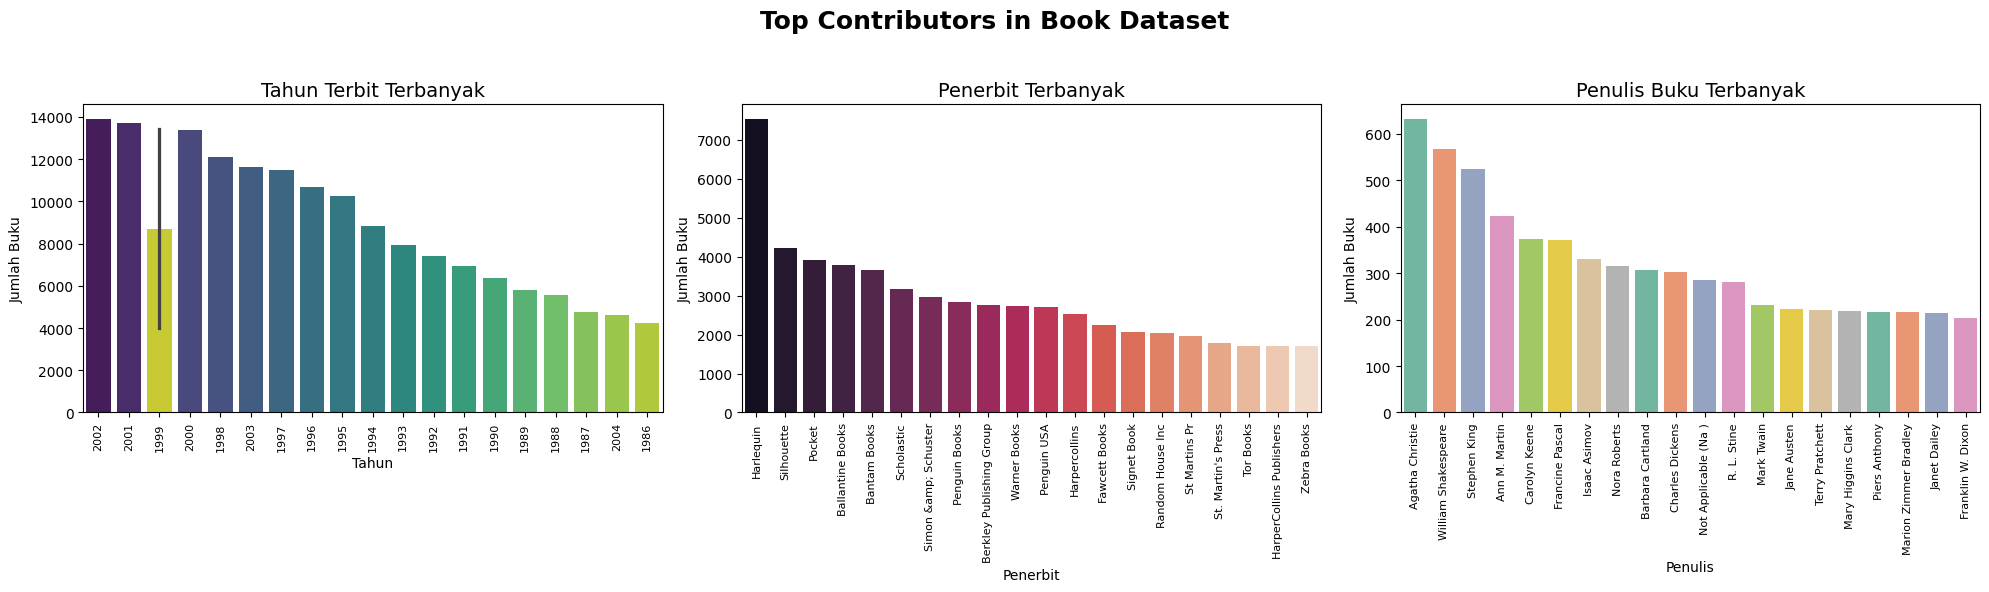

In [18]:
# Menghitung 20 entri teratas berdasarkan jumlah kemunculan untuk Year, Publisher, dan Author
books_qty = books['Year'].value_counts().reset_index(name='Count').rename(columns={'index': 'Year'}).sort_values('Count', ascending=False).head(20)
publisher_qty = books['Publisher'].value_counts().reset_index(name='Count').rename(columns={'index': 'Publisher'}).sort_values('Count', ascending=False).head(20)
author_qty = books['Author'].value_counts().reset_index(name='Count').rename(columns={'index': 'Author'}).sort_values('Count', ascending=False).head(20)

# Setup visualisasi
plt.figure(figsize=(20, 6))
plt.suptitle("Top Contributors in Book Dataset", fontsize=18, fontweight='bold')

# Plot untuk Tahun Terbit
plt.subplot(1, 3, 1)
sns.barplot(data=books_qty, x='Year', y='Count', palette='viridis')
plt.title('Tahun Terbit Terbanyak', fontsize=14)
plt.xlabel('Tahun', fontsize=10)
plt.ylabel('Jumlah Buku', fontsize=10)
plt.xticks(rotation=90, fontsize=8)

# Plot untuk Penerbit Terbanyak
plt.subplot(1, 3, 2)
sns.barplot(data=publisher_qty, x='Publisher', y='Count', palette='rocket')
plt.title('Penerbit Terbanyak', fontsize=14)
plt.xlabel('Penerbit', fontsize=10)
plt.ylabel('Jumlah Buku', fontsize=10)
plt.xticks(rotation=90, fontsize=8)

# Plot untuk Penulis Terbanyak
plt.subplot(1, 3, 3)
sns.barplot(data=author_qty, x='Author', y='Count', palette='Set2')
plt.title('Penulis Buku Terbanyak', fontsize=14)
plt.xlabel('Penulis', fontsize=10)
plt.ylabel('Jumlah Buku', fontsize=10)
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # menyesuaikan layout agar tidak terpotong
plt.show()

***Insight:***

Visualisasi menunjukkan bahwa tahun terbit terbanyak berasal dari tahun **2002**, diikuti oleh **2001** dan **2000**, masing-masing dengan jumlah buku yang sangat signifikan. Hal ini mengindikasikan bahwa dataset memiliki dominasi buku-buku yang diterbitkan pada awal 2000-an, yang mungkin dipengaruhi oleh perkembangan digitalisasi data saat itu.

Untuk penerbit, **Harlequin** menjadi penyumbang terbanyak dengan lebih dari 7.000 judul buku, disusul oleh **Silhouette**, **Pocket Books**, dan **Ballantine Books**. Ini menunjukkan bahwa penerbit besar dengan fokus pada fiksi populer sangat dominan dalam dataset ini.

Sementara itu, pada kategori penulis, **Agatha Christie** menjadi penulis dengan jumlah buku terbanyak, diikuti oleh **William Shakespeare**, **Ann M. Martin**, dan **Stephen King**. Banyaknya buku dari penulis-penulis terkenal ini mencerminkan popularitas dan produktivitas mereka serta bagaimana karya mereka sering dimuat dalam sistem distribusi buku global.

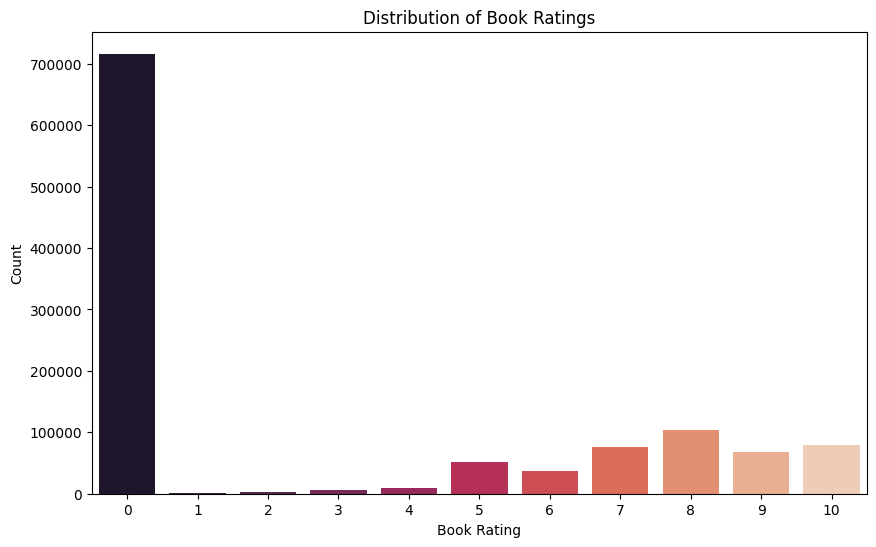

In [19]:
# Visualisasi distribusi rating buku dari dataset 'rating'
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=rating, palette='rocket')  # Membuat barplot distribusi rating
plt.title("Distribution of Book Ratings")  # Judul grafik
plt.xlabel("Book Rating")  # Label sumbu X
plt.ylabel("Count")  # Label sumbu Y
plt.show()  # Menampilkan grafik

***Insight:***

Distribusi rating buku menunjukkan bahwa rating 0 mendominasi secara signifikan dengan jumlah lebih dari 700.000 entri. Ini mengindikasikan bahwa sebagian besar interaksi dalam dataset merupakan rating implisit, di mana pengguna hanya membaca atau melihat buku tanpa memberikan penilaian eksplisit.

Sementara itu, untuk rating eksplisit (1–10), sebagian besar pengguna cenderung memberikan rating tinggi — terutama pada nilai 8, 10, dan 7, yang jumlahnya jauh lebih besar dibanding rating rendah (1–4). Pola ini mencerminkan kecenderungan pengguna untuk hanya menilai buku yang mereka sukai atau merasa puas terhadapnya, dan mengabaikan atau tidak menilai buku yang tidak disukai.

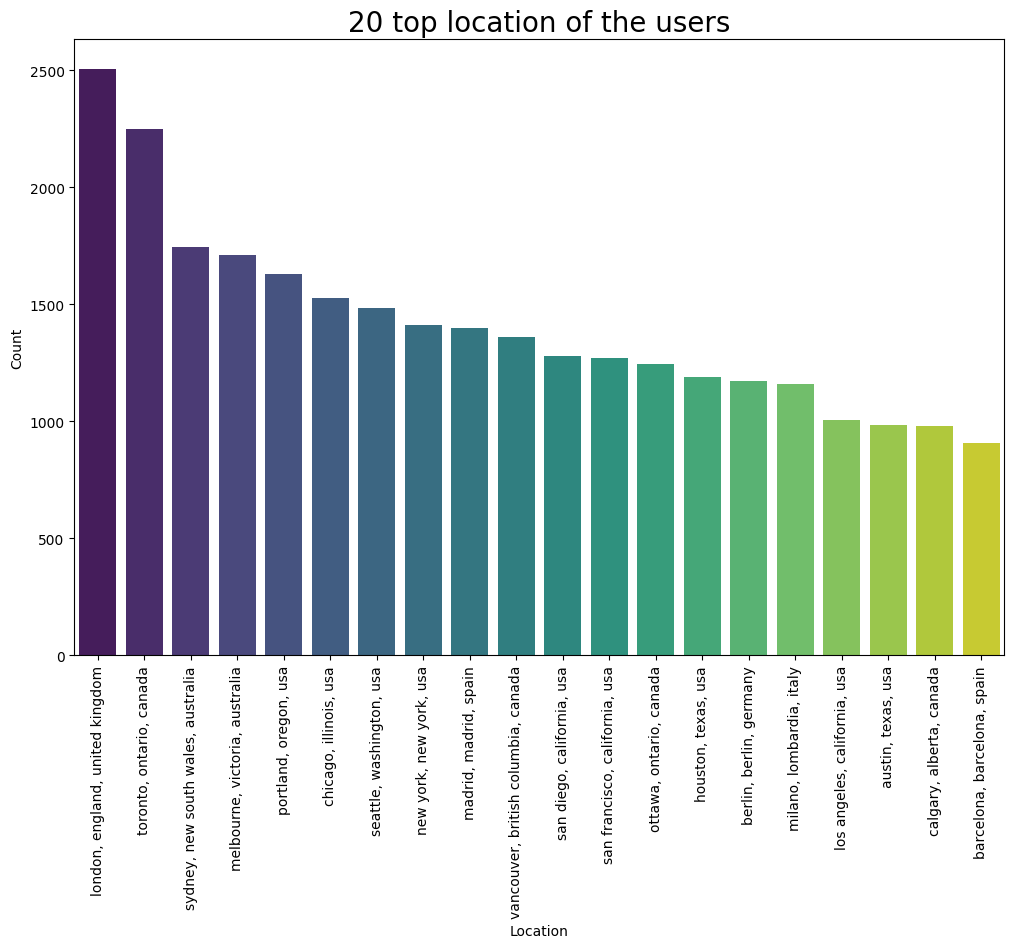

In [20]:
# Mengambil 20 lokasi pengguna terbanyak berdasarkan jumlah kemunculannya
user_location = user['Location'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(20)

# Visualisasi 20 lokasi pengguna terbanyak
plt.figure(figsize=(12,8))  # Mengatur ukuran figure
sns.barplot(data=user_location, x='Location', y='Count', palette='viridis')  # Membuat barplot
plt.xticks(rotation=90)  # Memutar label lokasi agar tidak saling tumpang tindih
plt.title('20 top location of the users', size=20)  # Menambahkan judul grafik
plt.show()  # Menampilkan grafik

***Insight:***

Visualisasi menunjukkan bahwa mayoritas pengguna berasal dari negara-negara berbahasa Inggris, terutama:

- London, England, United Kingdom menjadi lokasi pengguna terbanyak dengan lebih dari 2.500 pengguna.
- Disusul oleh kota-kota besar seperti Toronto, Ontario (Canada) dan Sydney, New South Wales (Australia).
- Beberapa kota besar di Amerika Serikat seperti Portland, Chicago, Seattle, New York, dan San Francisco juga mendominasi jumlah pengguna.

Selain itu, terlihat kontribusi signifikan dari kota-kota di Eropa seperti Madrid (Spanyol), Berlin (Jerman), dan Milano (Italia) serta beberapa kota di Kanada dan Australia.

Pola ini mengindikasikan bahwa data pengguna dalam dataset Book Recommendation didominasi oleh kawasan Amerika Utara, Eropa Barat, dan Australia, yang mungkin mencerminkan preferensi dan budaya literasi dari wilayah tersebut. Hal ini penting diperhatikan saat membangun sistem rekomendasi agar dapat mempertimbangkan keberagaman lokasi dan konteks budaya pengguna.

**Mengelompokkan data rating berdasarkan user_id dan menggambil 20 pengguna dengan jumlah rating terbanyak**

In [21]:
# Mengelompokkan data rating berdasarkan User_id, lalu menghitung jumlah dan rata-rata rating yang diberikan oleh masing-masing pengguna
User_rating = rating.groupby(['User_id'])['Rating'].agg(['count', 'mean']).reset_index()

# Mengganti nama kolom 'count' menjadi 'Count' agar lebih deskriptif
User_rating.rename(columns={'count': 'Count'}, inplace=True)

# Mengurutkan pengguna berdasarkan jumlah rating terbanyak, ambil 20 teratas
User_rating = User_rating.sort_values('Count', ascending=False).head(20)

# Menampilkan hasil akhir
User_rating

,User_id,Count,mean
4213,11676,13602,4.564917
74815,198711,7550,0.016291
58113,153662,6109,2.786872
37356,98391,5891,8.728230
13576,35859,5850,1.075897
80185,212898,4785,0.003135
105111,278418,4533,0.159276
28884,76352,3367,0.145233
42037,110973,3100,0.787742
88584,235105,3067,2.671992


***Insight:***

Dari analisis data rating, ditemukan 20 pengguna paling aktif dengan jumlah rating terbanyak. Informasi ini penting karena pengguna aktif berkontribusi besar dalam membentuk pola rekomendasi sistem. Rata-rata rating yang mereka berikan juga membantu memahami kecenderungan penilaian masing-masing pengguna, yang berguna untuk meningkatkan akurasi rekomendasi.

**Menggabungkan dataset rating dan books berdasarkan kolom ISBN**

In [22]:
# Menggabungkan data rating dengan data buku berdasarkan ISBN
data_merged = rating.merge(books, on='ISBN')

# Menampilkan dimensi dari DataFrame hasil gabungan
data_merged.shape

(1031136, 7)

In [23]:
# Menampilkan 2 baris pertama dari DataFrame 'data_merged'
# Ini berguna untuk melihat seperti apa struktur dan isi data setelah proses merge.
data_merged.head(2)

,User_id,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle


***Insight:***

Data rating dan buku berhasil digabungkan berdasarkan ISBN, menghasilkan lebih dari 1 juta baris data. Setiap interaksi pengguna kini dilengkapi informasi user_id, ISBN, rating, judul, penulis, tahun terbit, dan penerbit buku. Gabungan ini menjadi dasar penting untuk membangun sistem rekomendasi yang lebih akurat dan kontekstual.

**Mengelompokkan data berdasarkan judul buku dan mengurutkan dari jumlah rating terbanyak**

In [25]:
# Mengelompokkan data berdasarkan judul buku ('Title') dan menghitung:
# - jumlah rating (count)
# - rata-rata rating (mean)
title_rating = (
    data_merged
    .groupby(['Title'])['Rating']
    .agg(['count', 'mean'])               # Hitung jumlah dan rata-rata rating per judul buku
    .reset_index()                        # Reset index agar 'Title' jadi kolom biasa lagi
    .rename(columns={'count': 'Count'})   # Ubah nama kolom 'count' menjadi 'Count' (kapital)
    .sort_values('Count', ascending=False) # Urutkan berdasarkan jumlah rating, dari yang terbanyak
    .head(20)                             # Ambil 20 buku teratas dengan jumlah rating terbanyak
)

# Menampilkan hasil akhir: 20 buku paling banyak dirating beserta jumlah dan rata-rata rating-nya
title_rating

,Title,Count,mean
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
27922,Bridget Jones's Diary,815,3.527607
206502,The Secret Life of Bees,774,4.447028
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,3.437838
204387,The Red Tent (Bestselling Backlist),723,4.334716
14392,Angels &amp; Demons,670,3.708955


***Insight:***

Dari hasil pengelompokan data berdasarkan judul buku, ditemukan 20 buku yang paling banyak mendapatkan rating dari pengguna. Buku-buku ini memiliki tingkat popularitas tinggi karena sering dinilai oleh banyak pengguna. Selain itu, informasi rata-rata rating pada masing-masing buku juga membantu mengukur seberapa baik buku tersebut diterima. Data ini sangat berguna untuk mengidentifikasi buku-buku populer dan berkualitas, yang dapat dijadikan prioritas dalam sistem rekomendasi.

# **Data Preparation**

Dalam proyek ini, tahap data preparation dilakukan untuk memastikan bahwa data yang digunakan dalam model rekomendasi berada dalam kondisi optimal. Tujuannya adalah merapikan dan menyesuaikan struktur data mentah agar dapat langsung digunakan oleh model collaborative filtering.

Proses pembersihan data dilakukan melalui tiga tahap awal:
- Mengecek dan Menangani Duplikat <br>
Langkah pertama adalah mengidentifikasi dan menghapus data ganda yang berpotensi mengganggu hasil analisis dan akurasi model.
- Mengecek dan Menangani Missing Values <br>
Setelah data duplikat dibersihkan, proses dilanjutkan dengan mendeteksi nilai-nilai kosong atau hilang, lalu mengambil tindakan yang sesuai, seperti penghapusan atau imputasi, untuk menjaga integritas data.
- Melakukan Sampling Dataset<br>
Mengingat ukuran data yang besar, dilakukan sampling untuk mengambil sebagian data yang representatif agar proses pelatihan model lebih efisien dan cepat.

Setelah tahapan pembersihan awal, dilanjutkan ke proses preprocessing untuk pendekatan collaborative filtering, yaitu:
- Menyalin Data <br>
Membuat salinan dataset yang akan diproses khusus untuk kebutuhan model, tanpa memengaruhi data asli.
- Melakukan Encoding <br>
Mengubah nilai-nilai seperti User_id dan ISBN menjadi format numerik agar dapat dibaca dan diproses oleh algoritma collaborative filtering.
- Pembagian Data <br>
Membagi dataset yang sudah diproses menjadi data training dan data testing dengan perbandingan 80:20. Data training digunakan untuk melatih model, sedangkan data testing dipakai untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

## **Mengecek apakah ada data duplikat dari dataset gabungan**

Tahap ini menghapus data yang sama persis lebih dari satu kali. Duplikasi bisa membuat model belajar dari informasi berulang, sehingga menurunkan akurasi. Dengan menghilangkan duplikat, data jadi lebih bersih dan hasil analisis lebih akurat.

In [26]:
# Mengecek jumlah baris duplikat di DataFrame 'data_merged'
data_merged.duplicated().sum()

np.int64(0)

***Insight:***

Hasil pengecekan pada DataFrame `data_merged` menunjukkan bahwa tidak terdapat baris duplikat dalam data. Hal ini menandakan bahwa setiap interaksi pengguna terhadap buku bersifat unik, sehingga tidak diperlukan proses penghapusan duplikasi. Ini menjadi indikator positif karena kualitas data sudah cukup baik untuk langsung digunakan dalam tahap analisis atau pembangunan model rekomendasi.

## **Mengecek dan Menangani Missing Values**

Tahap ini bertujuan memastikan data yang digunakan bebas dari nilai kosong atau hilang yang bisa menimbulkan kesalahan atau bias. Dengan menangani missing values, dataset menjadi lebih lengkap dan hasil analisis maupun model prediksi jadi lebih tepat dan dapat diandalkan.

In [29]:
# Mengecek missing values
data_merged.isna().sum()

,0
User_id,0
ISBN,0
Rating,0
Title,0
Author,2
Year,0
Publisher,2


In [30]:
# Menghapus baris yang memiliki missing values pada kolom 'Author' dan 'Publisher'
data_merged.dropna(subset=['Author', 'Publisher'], inplace=True)

In [31]:
# Mengecek kembali untuk memastikan tidak ada missing values yang tersisa
data_merged.isna().sum()

,0
User_id,0
ISBN,0
Rating,0
Title,0
Author,0
Year,0
Publisher,0


***Insight:***

Dari hasil pemeriksaan, ditemukan adanya missing values sebanyak 2 entri pada kolom Author dan Publisher. Untuk menjaga konsistensi dan kualitas data, baris-baris tersebut dihapus. Setelah proses pembersihan dilakukan, pengecekan ulang memastikan bahwa seluruh kolom kini bebas dari nilai yang hilang, sehingga data siap digunakan untuk proses analisis dan pemodelan lebih lanjut.

## **Melakukan Sampling Dataset**

Tahap ini mengambil sampel acak sebanyak `500.000 baris` dari dataset agar proses eksplorasi, pelatihan, dan evaluasi bisa berjalan lebih cepat dan efisien. Pengaturan `random_state=42` memastikan hasil sampling sama setiap kali dijalankan, sehingga eksperimen menjadi konsisten.

In [32]:
data_small = data_merged.sample(500000, random_state=42).copy()

Dataframe `data_small` berhasil dibuat dengan mengambil 500.000 sampel dari data asli. Dengan ukuran yang lebih kecil ini, proses eksplorasi data dan pemodelan dapat dilakukan lebih cepat dan efisien. Meskipun jumlah data dikurangi, kualitas analisis tetap terjaga karena sampel yang diambil mewakili keseluruhan dataset secara acak dan konsisten.









## **Menyalin Data dan Melakukan Encoding**

Pada tahap ini dilakukan penyalinan data untuk memastikan proses pemodelan tidak mengubah data asli. Selanjutnya, dilakukan encoding terhadap kolom seperti User_id dan ISBN menjadi format numerik agar dapat dikenali dan diproses dengan baik oleh algoritma collaborative filtering.

In [33]:
# Salin data untuk collaborative filtering
cf_df = data_small.copy()

# Encode user dan ISBN
user_ids = cf_df['User_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

book_ids = cf_df['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

cf_df['user'] = cf_df['User_id'].map(user_to_user_encoded)
cf_df['book'] = cf_df['ISBN'].map(book_to_book_encoded)

# Variabel tambahan
num_users = len(user_to_user_encoded)
num_books = len(book_encoded_to_book)
min_rating = cf_df['Rating'].min()
max_rating = cf_df['Rating'].max()

print(f'Users: {num_users}, Books: {num_books}, Rating range: {min_rating}–{max_rating}')

Users: 61584, Books: 177748, Rating range: 0–10


***Insight:***

Dari hasil encoding data, diketahui terdapat `61.584` pengguna unik dan `177.748` buku unik dalam dataset. Ini menunjukkan skala data yang cukup besar dan bervariasi, yang menjadi dasar yang baik untuk membangun sistem rekomendasi berbasis collaborative filtering. Rentang rating yang ditemukan adalah dari `0 hingga 10`, yang memberi fleksibilitas model dalam mempelajari preferensi pengguna secara lebih detail. Informasi ini juga penting untuk menentukan strategi normalisasi atau penyesuaian skala rating selama proses pelatihan model.

## **Pembagian Data**

Pada tahap pembagian data, dataset yang telah diproses dibagi menjadi dua bagian, yaitu data training dan data testing dengan rasio 80:20. Data training berfungsi sebagai bahan pembelajaran bagi model untuk mengenali pola dan hubungan antara pengguna dan buku berdasarkan rating yang diberikan. Sementara itu, data testing digunakan untuk menguji seberapa baik model dapat melakukan prediksi terhadap data yang belum pernah dilihat sebelumnya. Pembagian ini penting untuk menilai kemampuan generalisasi model secara objektif.

In [34]:
x = cf_df[['user', 'book']].values
y = cf_df['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

***Insight:***

Pembagian data menjadi 80% training dan 20% testing memungkinkan proses pelatihan model berjalan dengan cukup data untuk memahami pola rekomendasi, sekaligus memberikan ruang evaluasi yang cukup untuk mengukur performa model. Dengan pendekatan ini, kita dapat memastikan bahwa model tidak hanya hafal data training, tetapi juga mampu memberikan prediksi yang akurat pada data baru, yang merupakan inti dari sistem rekomendasi yang efektif.

# **Model Development**

Pada tahap ini, fokus utama adalah mengembangkan sistem rekomendasi buku dengan menggunakan pendekatan `Collaborative Filtering`. Pendekatan ini bekerja dengan cara menganalisis pola interaksi antara pengguna dan buku — khususnya dari data rating yang diberikan — untuk memahami kesamaan preferensi antar pengguna. Dengan memahami pola tersebut, sistem dapat menyarankan buku-buku yang belum pernah dibaca oleh seorang pengguna, namun dinilai tinggi oleh pengguna lain yang memiliki kesukaan serupa, sehingga menghasilkan rekomendasi yang bersifat lebih personal dan relevan.

## **Collaborative Filtering**

### **Proses Training**

In [35]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.book_embedding = layers.Embedding(
            num_books, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        x = dot_user_book + user_bias + book_bias
        return tf.nn.sigmoid(x)

In [38]:
model = RecommenderNet(num_users, num_books, embedding_size=50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=8,
    validation_data=(x_val, y_val)
)

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.6394 - root_mean_squared_error: 0.4110 - val_loss: 0.5684 - val_root_mean_squared_error: 0.3677
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.5669 - root_mean_squared_error: 0.3668 - val_loss: 0.5933 - val_root_mean_squared_error: 0.3792
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.5826 - root_mean_squared_error: 0.3721 - val_loss: 0.5903 - val_root_mean_squared_error: 0.3749
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.6399 - root_mean_squared_error: 0.3928 - val_loss: 0.6019 - val_root_mean_squared_error: 0.3788
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.8371 - root_mean_squared_error: 0.4675 - val_loss: 0.6050 - val_root_mean_squared_error: 0.3703
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.1891 - root_mean_squared_error: 0.4443 - val_loss: 0.7310 - val_root_mean_squared_error: 0.4391
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1

***Insight:***

Hasil pelatihan selama 8 epoch menunjukkan bahwa model mencapai performa validasi terbaik pada epoch pertama dengan RMSE validasi sebesar 0.3677. Setelah itu, performa mulai menurun secara bertahap, yang mengindikasikan adanya overfitting. Hal ini terlihat jelas pada epoch 6 dan 7, di mana nilai loss dan RMSE meningkat tajam, menunjukkan bahwa model tidak lagi belajar dengan optimal dari data. Di akhir pelatihan (epoch 8), performa validasi sedikit membaik, namun tetap belum melebihi performa awal.

# **Evaluasi Model**

Pada tahap ini, proses evaluasi dilakukan untuk menilai sejauh mana model Collaborative Filtering mampu memberikan rekomendasi buku yang sesuai dengan preferensi pengguna. Evaluasi ini menjadi langkah penting untuk mengetahui akurasi dan efektivitas model dalam memprediksi rating atau ketertarikan pengguna terhadap buku-buku yang belum pernah mereka baca.

# **Metrik Visualisasi**

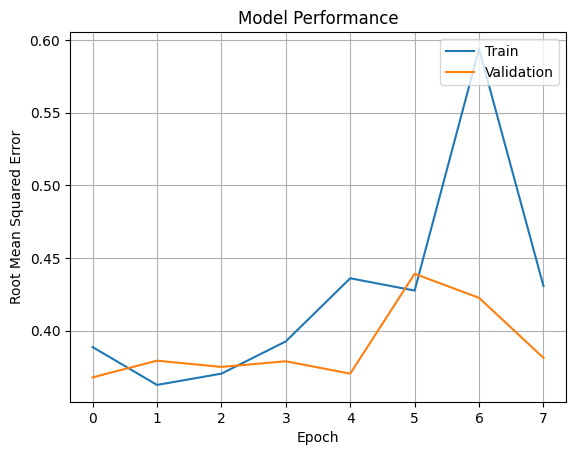

In [39]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Performance')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

***Insight:***

Berdasarkan visualisasi metrik Model Performance, terlihat bahwa model mengalami overfitting mulai dari epoch ke-5, ditandai dengan penurunan RMSE train namun peningkatan RMSE validation. Hal ini menunjukkan bahwa model mulai terlalu spesifik mempelajari pola data latih dan kehilangan kemampuan generalisasi pada data baru. Epoch ke-4 menjadi titik optimal di mana performa model masih stabil dan seimbang antara data latih dan validasi.

## **Mendapatkan Rekomendasi Buku**

In [40]:
def recommend_books_for_user(user_id, model, cf_df, user_to_user_encoded, user_encoded_to_user,
                             book_to_book_encoded, book_encoded_to_book, top_k=10):

    if user_id not in user_to_user_encoded:
        print(f"User {user_id} tidak ditemukan di data training.")
        return []

    user_encoded = user_to_user_encoded[user_id]

    # Buku yang sudah dibaca user
    books_read = cf_df[cf_df['User_id'] == user_id]['ISBN'].unique()
    books_not_read = [isbn for isbn in book_to_book_encoded.keys() if isbn not in books_read]
    books_not_read_encoded = [book_to_book_encoded[isbn] for isbn in books_not_read]

    user_array = np.array([user_encoded] * len(books_not_read_encoded))
    book_array = np.array(books_not_read_encoded)
    input_array = np.vstack((user_array, book_array)).T

    # Prediksi rating
    pred_ratings = model.predict(input_array, verbose=0).flatten()

    top_indices = pred_ratings.argsort()[-top_k:][::-1]
    top_book_encoded = [books_not_read_encoded[i] for i in top_indices]
    top_book_isbn = [book_encoded_to_book[i] for i in top_book_encoded]

    print(f"\nRekomendasi {top_k} buku untuk user {user_id}:\n")

    for isbn in top_book_isbn:
        title_row = cf_df[cf_df['ISBN'] == isbn]['Title']
        title = title_row.values[0] if not title_row.empty else "Judul tidak ditemukan"
        print(f"- {title}")

    return top_book_isbn

In [41]:
user_sample = cf_df['User_id'].sample(1).iloc[0]

recommend_books_for_user(
    user_sample,
    model,
    cf_df,
    user_to_user_encoded,
    user_encoded_to_user,
    book_to_book_encoded,
    book_encoded_to_book,
    top_k=10
)


Rekomendasi 10 buku untuk user 52293:

- Free
- Harry Potter and the Chamber of Secrets (Book 2)
- Harry Potter and the Goblet of Fire (Book 4)
- The Great Gatsby
- Harry Potter and the Sorcerer's Stone (Book 1)
- The Secret Life of Bees
- The Lovely Bones: A Novel
- Harry Potter and the Prisoner of Azkaban (Book 3)
- Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
- Anne Frank: The Diary of a Young Girl


['1844262553',
 '0439064864',
 '0439139597',
 '0684801523',
 '0590353403',
 '0670894605',
 '0316666343',
 '0439136350',
 '059035342X',
 '0553296981']

***Insight:***

Model berhasil memberikan rekomendasi buku yang tampaknya sangat relevan dengan minat pengguna. Hal ini terlihat dari dominasi seri Harry Potter, yang muncul sebanyak lima judul berbeda, menunjukkan bahwa pengguna kemungkinan memiliki preferensi kuat terhadap genre fantasi atau fiksi populer. Selain itu, buku-buku lain yang direkomendasikan seperti The Great Gatsby, The Secret Life of Bees, dan Anne Frank: The Diary of a Young Girl menunjukkan kecenderungan terhadap bacaan klasik dan novel dengan nilai historis atau emosional yang kuat. Rekomendasi ini mengindikasikan bahwa model Collaborative Filtering mampu menangkap pola preferensi pengguna melalui kesamaan rating dengan pengguna lain yang memiliki ketertarikan serupa. Secara keseluruhan, hasil rekomendasi sudah cukup personal dan relevan dengan karakteristik pengguna.